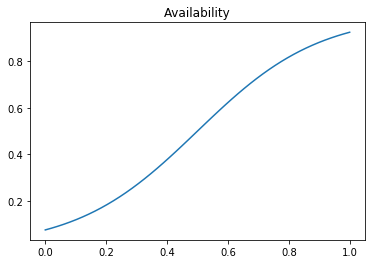

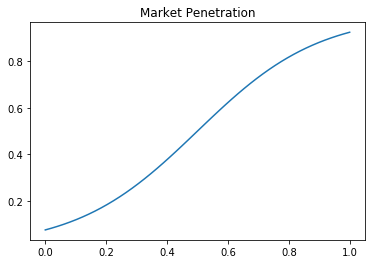

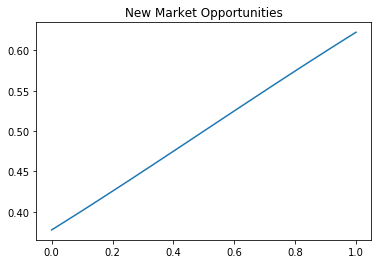

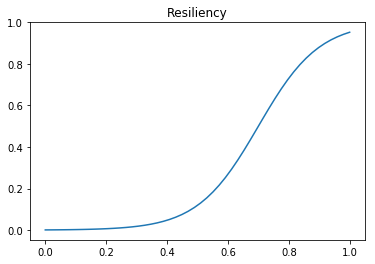

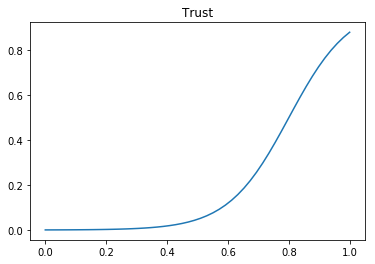

In [2]:
import utility_curves
import numpy as np
import matplotlib.pyplot as plt
import tradespace

x = np.linspace(0,1)
rater = tradespace.load_tradespace("attributes.yml")
for key,attribute in rater.attributes.items():
    plt.title(key)
    plt.plot(x, attribute.utility_score(x))
    plt.show()

In [3]:
rater.generate_morph_matrix("morph_matrix_2.csv")

In [4]:
import permutations
permutations.generate_and_export_permutations("morph_matrix_2.csv", "concepts_2.csv")

Interfaces,Proprietary,New Open Standard,Existing Standard

['Interfaces', 'Proprietary', 'New Open Standard', 'Existing Standard']
Power Generation Model,Small on Distribution Lines,Medium on Distribution Lines,Large on Transmission Lines

['Power Generation Model', 'Small on Distribution Lines', 'Medium on Distribution Lines', 'Large on Transmission Lines']
Power Storage Model,Individual,Collective

['Power Storage Model', 'Individual', 'Collective']
Marketplace Transparency,Closed,Open

['Marketplace Transparency', 'Closed', 'Open']
Legacy Producers Handling,No Interfacing,Interface for Billing Only,Interface for Billing and Generation

['Legacy Producers Handling', 'No Interfacing', 'Interface for Billing Only', 'Interface for Billing and Generation']
Trading Platform Enrollment,No Restriction,Controlled

['Trading Platform Enrollment', 'No Restriction', 'Controlled']
Pricing Control,Prosumer Defined Pricing,Regulated Prosumer Defined Pricing,Fixed Price

['Pricing Control', 'Prosu

In [5]:
import csv
scores = []
fieldnames = []
with open("concepts_2.csv") as input_file:
    reader = csv.DictReader(f=input_file)
    fieldnames = reader.fieldnames
    for concept in reader:
        scores.append((rater.score_concept(concept=concept), concept))

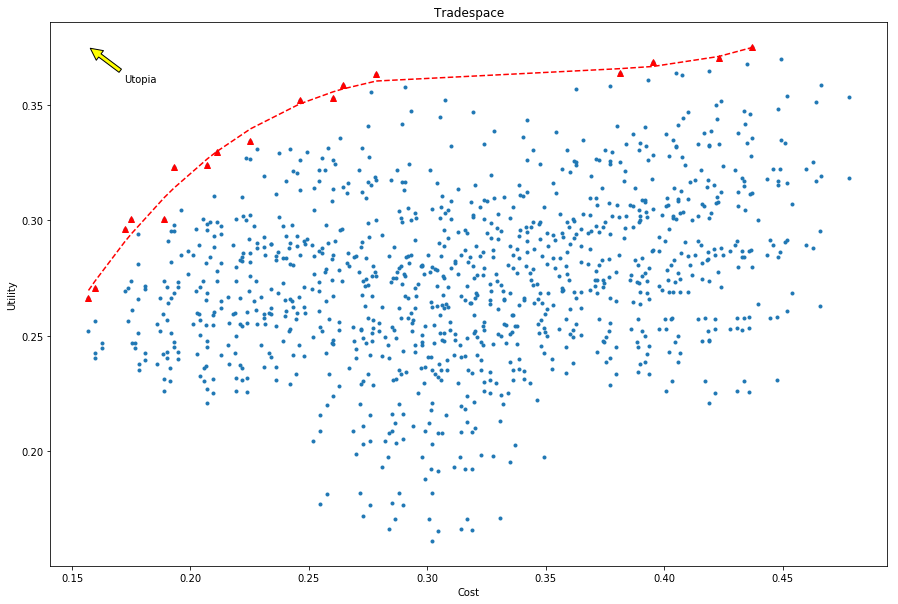

In [6]:
x = []
y = []
local_maximums = {}
for score, concept in scores:
    x.append(score['Cost'])
    y.append(score['Utility'])
    if x[-1] not in local_maximums or y[-1] > local_maximums[x[-1]][0]:
        local_maximums[x[-1]] = (y[-1], concept)

plt.figure(figsize=(15,10))
plt.title('Tradespace')
plt.ylabel('Utility')
#plt.axis([0.1,0.5, 0,0.5])
plt.xlabel('Cost')
plt.plot(x, y, '.')
plt.annotate('Utopia', xy=(min(x),max(y)), xytext=(min(x)+0.015, max(y)-0.015),
            arrowprops=dict(facecolor='yellow', shrink=0.05),
            )

#Find non dominated points
non_dominated = []
x_ordered = sorted(set(x))
for x in x_ordered:
    if len(non_dominated) == 0 or local_maximums[x][0] > non_dominated[-1][1]:
        non_dominated.append((x, local_maximums[x][0], local_maximums[x][1]))

non_dominated_x = [z[0] for z in non_dominated]
non_dominated_y = [z[1] for z in non_dominated]
plt.plot(non_dominated_x, non_dominated_y, 'r^')

#Plot a trendline
z = np.polyfit(non_dominated_x, non_dominated_y, 3)
p = np.poly1d(z)
plt.plot(non_dominated_x,p(non_dominated_x),"r--")

plt.show()

with open('non_dominated.csv', 'w') as output_non_dominated:
    writer = csv.DictWriter(f = output_non_dominated, fieldnames = fieldnames + ['Cost', 'Utility'])
    for cost,util,concept in non_dominated:
        row = concept
        row.update({'Cost': cost, 'Utility': util})
        writer.writerow(row)